In [74]:
#Imports

import os
import requests
import json
import pandas as pd
import numpy as np
import alpaca_trade_api as alpaca
from alpaca_trade_api import REST, TimeFrame


Ticker

In [75]:
tickers = "VALE"

Timeframe

In [76]:
timeframe = "1D"



start_date = pd.Timestamp("2018-01-29", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-1-14", tz="America/New_York").isoformat()


Connection/Get Barset

In [77]:
connection = REST()

In [78]:
prices = connection.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


prices


VALE                                   
                            open   high      low    close    volume
time                                                               
2018-01-29 00:00:00-05:00  13.21  13.24  12.9700  13.0500  14505054
2018-01-30 00:00:00-05:00  13.06  13.11  12.8900  12.9900  20470056
2018-01-31 00:00:00-05:00  13.41  13.42  12.9250  13.0900  24395030
2018-02-01 00:00:00-05:00  13.09  13.35  13.0800  13.1735  22225007
2018-02-02 00:00:00-05:00  12.87  12.93  12.5300  12.5500  30830760
...                          ...    ...      ...      ...       ...
2022-01-10 00:00:00-05:00  14.85  14.88  14.5250  14.6400  26965519
2022-01-11 00:00:00-05:00  14.88  15.25  14.8316  15.2400  28789981
2022-01-12 00:00:00-05:00  15.51  15.60  15.3200  15.5600  30636801
2022-01-13 00:00:00-05:00  15.39  15.54  15.2100  15.3000  30957684
2022-01-14 00:00:00-05:00  15.05  15.44  15.0300  15.3800  24218710

[1000 rows x 5 columns]

Close Price function

In [79]:
def get_close_prices(ticker):
    prices=connection.get_barset(
    ticker, 
    timeframe, 
    start=start_date, 
    end=end_date,
    limit=1000
).df

    prices = prices.xs("close", level=1, axis="columns")

    return(pd.DataFrame(prices))
    
close_prices = get_close_prices(tickers)

close_prices
    

,VALE
time,
2018-01-29 00:00:00-05:00,13.0500
2018-01-30 00:00:00-05:00,12.9900
2018-01-31 00:00:00-05:00,13.0900
2018-02-01 00:00:00-05:00,13.1735
2018-02-02 00:00:00-05:00,12.5500
...,...
2022-01-10 00:00:00-05:00,14.6400
2022-01-11 00:00:00-05:00,15.2400
2022-01-12 00:00:00-05:00,15.5600


Price Chart

<AxesSubplot:xlabel='time'>

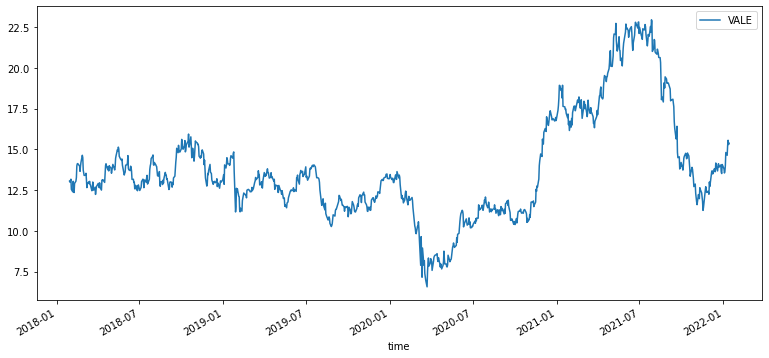

In [80]:
close_prices.plot(
    figsize=(13,6)
)

Sharpe

In [81]:
# Annual Returns

ticker_annual_returns = (close_prices.pct_change().dropna()).mean() * 252


# Annual std Deviation

ticker_annual_std = ((close_prices.pct_change().dropna()).std()) * np.sqrt(252)


# Sharpe

ticker_sharpe = ticker_annual_returns / ticker_annual_std


print(f"returns    {ticker_annual_returns}")

print(f"std    {ticker_annual_std}")

print(f"sharpe    {ticker_sharpe}")


returns    VALE    0.151084
dtype: float64
std    VALE    0.469227
dtype: float64
sharpe    VALE    0.321985
dtype: float64
